In [1]:
import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt
import sqlalchemy

from datetime import datetime

import seaborn as sns

from sklearn.linear_model import (
    LinearRegression
)

from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler
)

# Extração e Tratamento de Dados (Básico)

## 1. Extração de Dados

### 1.1. CSV

In [2]:
data = pd.read_csv(
    "./dados/winequality-red.csv",  # caminho do arquivo
    sep=";",                        # separador do arquivo
    decimal=",",                    # caractere que separa a parte intera da decimal
    thousands="."                   # caractere que separa as unidades de milhar
)

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


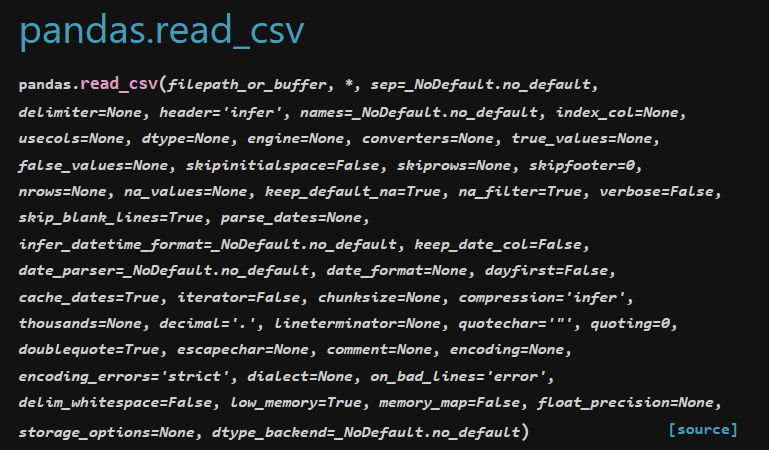

### 1.2. Excel

In [3]:
data = pd.read_excel("./dados/winequality.xlsx")

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1001.0000,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# importando apenas uma folha de uma planilha

data_one_sheet = pd.read_excel("./dados/teste_dados.xlsx", sheet_name="teste1")

data_one_sheet.head()

,col1,col2,col3
0,1,2,3
1,4,5,6
2,7,8,9


In [5]:
# importando todas as folhas de uma planilha

data_all_sheets = pd.read_excel("./dados/teste_dados.xlsx", sheet_name=None)

for sheet_name, dataframe in data_all_sheets.items():
    print(sheet_name, dataframe)

teste1    col1  col2  col3
0     1     2     3
1     4     5     6
2     7     8     9
teste2    col4  col5  col6
0    10    11    12
1    13    14    15
2    16    17    18
teste3    col1  col2  col3
0    19    20    21
1    22    23    24
2    25    26    27


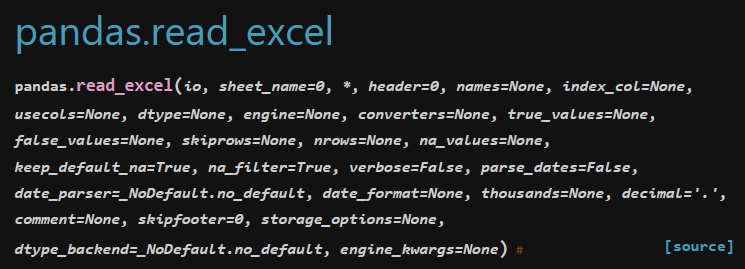

### 1.3. Parquet

In [6]:
data = pd.read_parquet("./dados/winequality.parquet")

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


![1 Eq8aSeERya4lOV4-lu7mXg.png](<attachment:1 Eq8aSeERya4lOV4-lu7mXg.png>)
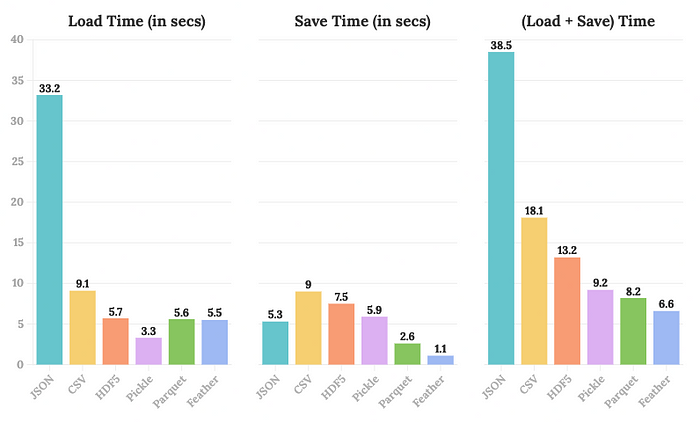

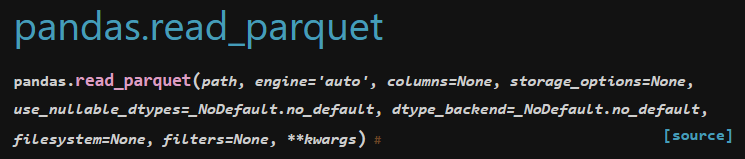

### 1.4. Feather

In [7]:
data = pd.read_feather("./dados/winequality.feather")

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


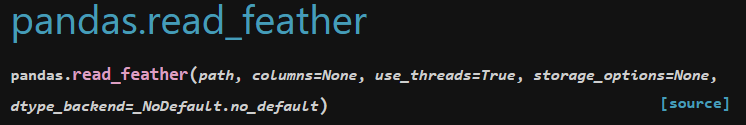

### 1.5. Banco de Dados

In [8]:
# engine de conexão
engine_str = 'sqlite:///dados/chinook.sqlite'

engine = sqlalchemy.create_engine(engine_str)

# nome das tabelas
table_names = sqlalchemy.inspect(engine).get_table_names()

print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


In [9]:
# rodando uma query
df = pd.read_sql_query("SELECT * FROM Artist", engine)

df.head()

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


### 1.6. Web Scrap

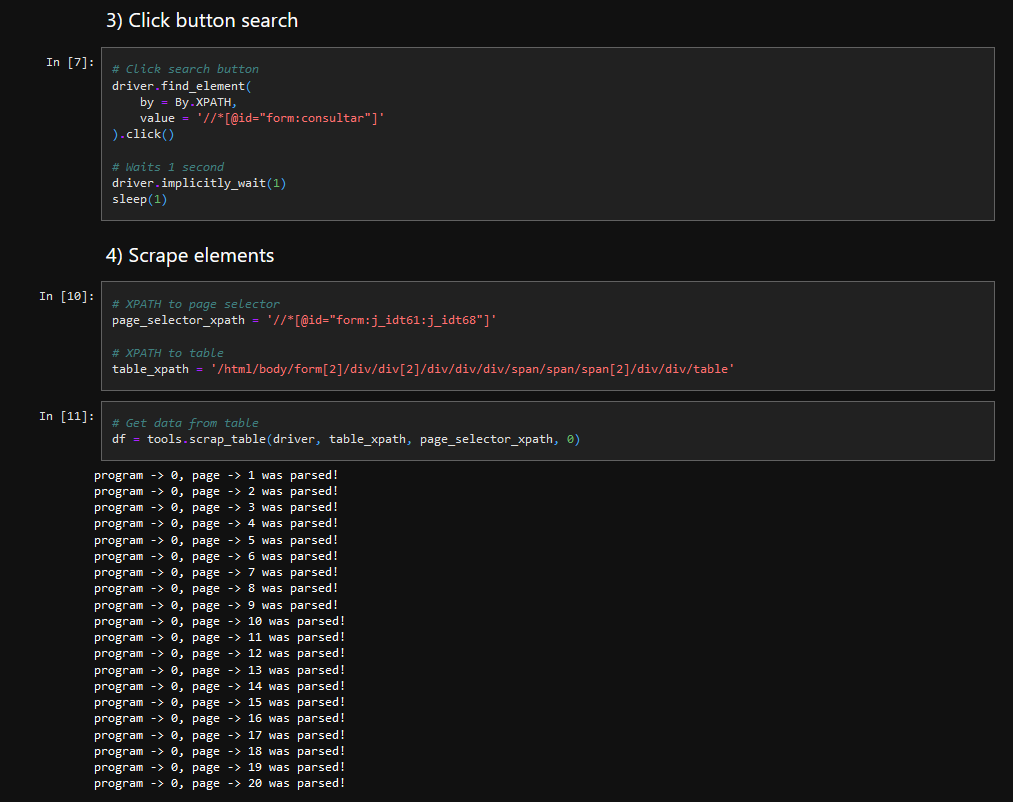

## 2. Funcionalidades do Pandas

### 2.1. Estatísticas de Resumo

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1.599000e+03,1599.000000
mean,8.319637,3.879687,0.270976,2.538806,0.087467,15.874922,46.467792,1257.356925,3.311113,0.658149,1.455285e+12,5.636023
std,1.741096,60.015370,0.194801,1.409928,0.047065,10.460157,32.895324,9784.883345,0.154386,0.169507,3.370300e+13,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000e+00,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000e+00,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,1.020000e+01,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,1.110000e+01,6.000000
max,15.900000,1185.000000,1.000000,15.500000,0.611000,72.000000,289.000000,100369.000000,4.010000,2.000000,9.566667e+14,8.000000


### 2.2. Tipos de Dados

In [12]:
data_produtos = {
    "nome": ["banana", "maça", "abacaxi", "melancia"],
    "preco": [1.2, 5.5, 3.7, 0.3],
    "quantidade": [10, 13, 9, 2],
    "fruta": [True, True, True, True],
    "data_compra": ["05/02/2024", "01/01/2024", "07/08/2021", "10/10/2023"]
}

data_produtos = pd.DataFrame(data_produtos)

data_produtos.head()

,nome,preco,quantidade,fruta,data_compra
0,banana,1.2,10,True,05/02/2024
1,maça,5.5,13,True,01/01/2024
2,abacaxi,3.7,9,True,07/08/2021
3,melancia,0.3,2,True,10/10/2023


#### 2.2.1. Object (String)

In [13]:
data_produtos["nome"]

0      banana
1        maça
2     abacaxi
3    melancia
Name: nome, dtype: object

In [14]:
data_produtos["nome"].apply(str.split, args=["a"])

0     [b, n, n, ]
1        [m, ç, ]
2    [, b, c, xi]
3    [mel, nci, ]
Name: nome, dtype: object

In [15]:
data_produtos["nome"].apply(str.split, args=["a"]).apply(lambda x: "".join(x))

0       bnn
1        mç
2      bcxi
3    melnci
Name: nome, dtype: object

#### 2.2.2. Integer

In [16]:
data_produtos["quantidade"]

0    10
1    13
2     9
3     2
Name: quantidade, dtype: int64

In [17]:
data_produtos["quantidade"].apply(int.__add__, args=[1])

0    11
1    14
2    10
3     3
Name: quantidade, dtype: int64

In [18]:
data_produtos["quantidade"].iloc[1] = pd.NA

data_produtos.head()

C:\Users\saulo\AppData\Local\Temp\ipykernel_2908\397028753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_produtos["quantidade"].iloc[1] = pd.NA


,nome,preco,quantidade,fruta,data_compra
0,banana,1.2,10.0,True,05/02/2024
1,maça,5.5,NaN,True,01/01/2024
2,abacaxi,3.7,9.0,True,07/08/2021
3,melancia,0.3,2.0,True,10/10/2023


#### 2.2.3. Float

In [19]:
data_produtos["preco"]

0    1.2
1    5.5
2    3.7
3    0.3
Name: preco, dtype: float64

In [20]:
data_produtos["preco"].dtypes

dtype('float64')

In [21]:
data_float = pd.read_csv("./dados/winequality-red.csv", sep=";", decimal=",", thousands=".", 
dtype={
    "chlorides": np.float16
}
)

data_float.dtypes["chlorides"]

dtype('float16')

#### 2.2.4. Datetime

In [22]:
data_produtos["data_compra"] = pd.to_datetime(data_produtos["data_compra"], dayfirst=True)

data_produtos["data_compra"]

0   2024-02-05
1   2024-01-01
2   2021-08-07
3   2023-10-10
Name: data_compra, dtype: datetime64[ns]

In [23]:
data_produtos["ano_compra"] = data_produtos["data_compra"].dt.year

data_produtos["ano_compra"]

0    2024
1    2024
2    2021
3    2023
Name: ano_compra, dtype: int64

In [24]:
data_produtos["data_compra <= 05/07/2023"] = data_produtos["data_compra"] <= datetime(2023, 7, 5)

data_produtos["data_compra <= 05/07/2023"]

0    False
1    False
2     True
3    False
Name: data_compra <= 05/07/2023, dtype: bool

In [25]:
data_produtos["data_extensa"] = data_produtos["data_compra"].dt.strftime("%A, %d %B %Y")

data_produtos["data_extensa"]

0    Monday, 05 February 2024
1     Monday, 01 January 2024
2    Saturday, 07 August 2021
3    Tuesday, 10 October 2023
Name: data_extensa, dtype: object

#### 2.2.5. Boolean

In [26]:
data_produtos["fruta"]

0    True
1    True
2    True
3    True
Name: fruta, dtype: bool

### 2.3. Conversão

In [27]:
data_produtos["preco"].astype(str)

0    1.2
1    5.5
2    3.7
3    0.3
Name: preco, dtype: object

In [28]:
data_produtos["preco"].astype(np.int32)

0    1
1    5
2    3
3    0
Name: preco, dtype: int32

### 2.4. Duplicatas

In [29]:
data_copy = data.copy()

data_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
# identifica as duplicatas

data_copy.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [31]:
# elimina as duplicatas (possuem os mesmos valores para todas as colunas)

data_copy.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [32]:
# elimina os registros que possuem a coluna 'pH' com o mesmo valor

data_copy.drop_duplicates(subset=["pH"])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7
1111,5.4,0.42,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,7
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6
1316,5.4,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6


### 2.5. Valores Ausentes

In [33]:
data_ = {
    "categoria": ["aaa", pd.NA, "ccc", "ddd", "eee", "aaa", "ggg"],
    "idade": [15, 40, 22, 91, np.nan, 37, 51],
    "altura": [1.7, 1.8, None, 1.6, 1.7, 1.8, np.NAN],
    "estado": ["rj", "rj", "ba", np.nan, "rj", "pa", "unknow"],
    "envergadura": [1.2, 0.7, 1.1, 0.9, 0.6, np.nan, np.nan]
}

data_ = pd.DataFrame(data_)
data_

,categoria,idade,altura,estado,envergadura
0,aaa,15.0,1.7,rj,1.2
1,<NA>,40.0,1.8,rj,0.7
2,ccc,22.0,NaN,ba,1.1
3,ddd,91.0,1.6,NaN,0.9
4,eee,NaN,1.7,rj,0.6
5,aaa,37.0,1.8,pa,NaN
6,ggg,51.0,NaN,unknow,NaN


#### 2.5.1. Detectando valores ausentes

In [34]:
data_["estado"].replace("unknow", np.nan, inplace=True)

data_

,categoria,idade,altura,estado,envergadura
0,aaa,15.0,1.7,rj,1.2
1,<NA>,40.0,1.8,rj,0.7
2,ccc,22.0,NaN,ba,1.1
3,ddd,91.0,1.6,NaN,0.9
4,eee,NaN,1.7,rj,0.6
5,aaa,37.0,1.8,pa,NaN
6,ggg,51.0,NaN,NaN,NaN


In [35]:
# pandas reconhece diversos tipos de NULL

data_.isna()

,categoria,idade,altura,estado,envergadura
0,False,False,False,False,False
1,True,False,False,False,False
2,False,False,True,False,False
3,False,False,False,True,False
4,False,True,False,False,False
5,False,False,False,False,True
6,False,False,True,True,True


In [36]:
# avaliando se registro é NULL

data.iloc[1, 0] is None     # ERRADO

data.iloc[1, 0] is np.nan   # ERRADO

data.iloc[1, 0] == pd.NA    # ERRADO

pd.isna(data_.iloc[1, 0])   # CORRETO

True

#### 2.5.2. Tratando valores ausentes

##### 2.5.2.1. Removendo

In [37]:
# Removendo valores ausentes

data_.dropna()

,categoria,idade,altura,estado,envergadura
0,aaa,15.0,1.7,rj,1.2


##### 2.5.2.2. Sinalizando

In [38]:
# em algumas ocasiões pode ser útil criar uma categoria para valores ausentes

data_.loc[data_["categoria"].isna(), "categoria"] = "não informado"

data_

,categoria,idade,altura,estado,envergadura
0,aaa,15.0,1.7,rj,1.2
1,não informado,40.0,1.8,rj,0.7
2,ccc,22.0,NaN,ba,1.1
3,ddd,91.0,1.6,NaN,0.9
4,eee,NaN,1.7,rj,0.6
5,aaa,37.0,1.8,pa,NaN
6,ggg,51.0,NaN,NaN,NaN


##### 2.5.2.3. Usando a moda (tipo object)

In [39]:
elemento_moda = data_["estado"].value_counts().index[0]

data_.loc[data_["estado"].isna(), "estado"] = elemento_moda

data_

,categoria,idade,altura,estado,envergadura
0,aaa,15.0,1.7,rj,1.2
1,não informado,40.0,1.8,rj,0.7
2,ccc,22.0,NaN,ba,1.1
3,ddd,91.0,1.6,rj,0.9
4,eee,NaN,1.7,rj,0.6
5,aaa,37.0,1.8,pa,NaN
6,ggg,51.0,NaN,rj,NaN


##### 2.5.2.4. Usando a média / mediana (tipo int ou float)

In [40]:
data_.loc[data_["altura"].isna(), "altura"] = data_["altura"].mean()

data_

,categoria,idade,altura,estado,envergadura
0,aaa,15.0,1.70,rj,1.2
1,não informado,40.0,1.80,rj,0.7
2,ccc,22.0,1.72,ba,1.1
3,ddd,91.0,1.60,rj,0.9
4,eee,NaN,1.70,rj,0.6
5,aaa,37.0,1.80,pa,NaN
6,ggg,51.0,1.72,rj,NaN


In [41]:
data_.loc[data_["idade"].isna(), "idade"] = data_["idade"].median()

data_

,categoria,idade,altura,estado,envergadura
0,aaa,15.0,1.70,rj,1.2
1,não informado,40.0,1.80,rj,0.7
2,ccc,22.0,1.72,ba,1.1
3,ddd,91.0,1.60,rj,0.9
4,eee,38.5,1.70,rj,0.6
5,aaa,37.0,1.80,pa,NaN
6,ggg,51.0,1.72,rj,NaN


##### 2.5.2.5. Usando regressão linear (tipo int ou float)

In [42]:
data_clean = data_.loc[data_["envergadura"].notna(), ["altura", "idade", "envergadura"]].copy()

data_clean

,altura,idade,envergadura
0,1.70,15.0,1.2
1,1.80,40.0,0.7
2,1.72,22.0,1.1
3,1.60,91.0,0.9
4,1.70,38.5,0.6


In [43]:
X, y = data_clean.drop(["envergadura"], axis=1).values, data_clean["envergadura"].values

model = LinearRegression().fit(X, y)

data_.loc[data_["envergadura"].isna(), "envergadura"] = model.predict(data_.loc[data_["envergadura"].isna(), ["altura", "idade"]])

data_

c:\Users\saulo\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,categoria,idade,altura,estado,envergadura
0,aaa,15.0,1.70,rj,1.200000
1,não informado,40.0,1.80,rj,0.700000
2,ccc,22.0,1.72,ba,1.100000
3,ddd,91.0,1.60,rj,0.900000
4,eee,38.5,1.70,rj,0.600000
5,aaa,37.0,1.80,pa,0.667519
6,ggg,51.0,1.72,rj,0.785656


### 2.6. Filtros

In [44]:
codigo = ["www", "xxx", "yyy", "zzz"]

data_ = {
    "estado": ["rj", "es", np.nan, "ba"],
    "valor": [1, 5, 3, 7]
}

data_ = pd.DataFrame(data_, index=codigo)

data_

,estado,valor
www,rj,1
xxx,es,5
yyy,NaN,3
zzz,ba,7


#### 2.6.1. iloc

seleciona os elementos de acordo com sua posição numérica

In [45]:
# selecionando uma linha como series

data_.iloc[1, :]

estado    es
valor      5
Name: xxx, dtype: object

In [46]:
# selecionando uma linha como dataframe

data_.iloc[[1], :]

,estado,valor
xxx,es,5


In [47]:
# selecionando uma coluna como series

data_.iloc[:, 1]

www    1
xxx    5
yyy    3
zzz    7
Name: valor, dtype: int64

In [48]:
# selecionando uma coluna como dataframe

data_.iloc[:, [1]]

,valor
www,1
xxx,5
yyy,3
zzz,7


In [49]:
# selecionando um elemento como valor

data_.iloc[2, 1]

3

In [50]:
# selecionando um elemento como series

data_.iloc[[2], 1]

yyy    3
Name: valor, dtype: int64

In [51]:
# selecionando um elemento como dataframe

data_.iloc[[2], [1]]

,valor
yyy,3


In [52]:
# selecionando mais de uma coluna e linha

data_.iloc[1:3, 0:2]

,estado,valor
xxx,es,5
yyy,NaN,3


#### 2.6.2. loc

seleciona os elementos de acordo com seu index e coluna

In [53]:
# selecionando uma linha como series

data_.loc["www", :]

estado    rj
valor      1
Name: www, dtype: object

In [54]:
# selecionando uma linha como dataframe

data_.loc[["www"], :]

,estado,valor
www,rj,1


In [55]:
# selecionando uma coluna

data_.loc[:, ["valor"]]

,valor
www,1
xxx,5
yyy,3
zzz,7


In [56]:
# selecionando um elemento

data_.loc["www", "valor"]

1

In [57]:
# inserindo uma condição

data_.loc[data_["valor"].notna()]

,estado,valor
www,rj,1
xxx,es,5
yyy,NaN,3
zzz,ba,7


In [58]:
# inserindo uma condição

data_.loc[data_["valor"].notna(), "valor"]

www    1
xxx    5
yyy    3
zzz    7
Name: valor, dtype: int64

In [59]:
# inserindo uma condição

data_.loc[data_["estado"].notna(), ["valor", "estado"]]

,valor,estado
www,1,rj
xxx,5,es
zzz,7,ba


#### 2.6.3. isin

In [60]:
data_[data_["estado"].isin(["rj", "es"])]

,estado,valor
www,rj,1
xxx,es,5


In [61]:
data_[~data_["estado"].isin(["rj", "es"])]

,estado,valor
yyy,NaN,3
zzz,ba,7


In [62]:
data_[(
    (~data_["estado"].isin(["rj", "es"])) &
    (data_["estado"].notna())
)]

,estado,valor
zzz,ba,7


#### 2.6.4. query

In [63]:
data_.query('estado == "rj"')

,estado,valor
www,rj,1


In [64]:
data_.query('valor <= 5')

,estado,valor
www,rj,1
xxx,es,5
yyy,NaN,3


In [65]:
data_.query('valor <= 5 and estado != "rj"')

,estado,valor
xxx,es,5
yyy,NaN,3


In [66]:
data_.query('valor <= 5 or estado != "ba"')

,estado,valor
www,rj,1
xxx,es,5
yyy,NaN,3


### 2.7. Combinação

#### 2.7.1. concat

In [67]:
data1 = {
    "nome": ["a", "b"],
    "idade": [11, 21]
}

data2 = {
    "nome": ["c", "d"],
    "idade": [13, 40]
}

data1 = pd.DataFrame(data1)
data2 = pd.DataFrame(data2)

pd.concat(
    [data1, data2],
    axis=0
)

,nome,idade
0,a,11
1,b,21
0,c,13
1,d,40


In [68]:
pd.concat(
    [data1, data2],
    axis=0,
    ignore_index=True
)

,nome,idade
0,a,11
1,b,21
2,c,13
3,d,40


In [69]:
data3 = {
    "altura": [1.7, 2],
    "peso": [70, 90]
}

data3 = pd.DataFrame(data3)

pd.concat(
    [data1, data3],
    axis=1
)

,nome,idade,altura,peso
0,a,11,1.7,70
1,b,21,2.0,90


#### 2.7.2. merge

In [70]:
data1 = {
    "id": [1, 2, 3, 4, 5],
    "nome": ["a", "b", "c", "d", "e"]
}

data2 = {
    "id": [2, 3, 4, 6, 7],
    "peso": [80, 90, 100, 90, 90]
}

data1 = pd.DataFrame(data1)
data2 = pd.DataFrame(data2)

##### 2.7.2.1. inner join

In [71]:
pd.merge(
    data1,
    data2,
    how="inner",
    on="id"
)

,id,nome,peso
0,2,b,80
1,3,c,90
2,4,d,100


##### 2.7.2.2. left join

In [72]:
pd.merge(
    data1,
    data2,
    how="left",
    on="id"
)

,id,nome,peso
0,1,a,NaN
1,2,b,80.0
2,3,c,90.0
3,4,d,100.0
4,5,e,NaN


##### 2.7.2.3. right join

In [73]:
pd.merge(
    data1,
    data2,
    how="right",
    on="id"
)

,id,nome,peso
0,2,b,80
1,3,c,90
2,4,d,100
3,6,NaN,90
4,7,NaN,90


##### 2.7.2.4. outer join

In [74]:
pd.merge(
    data1,
    data2,
    how="outer",
    on="id"
)

,id,nome,peso
0,1,a,NaN
1,2,b,80.0
2,3,c,90.0
3,4,d,100.0
4,5,e,NaN
5,6,NaN,90.0
6,7,NaN,90.0


### 2.8. Extras

#### 2.8.1. pivot_table

In [76]:
data = pd.DataFrame(
    {
        "A": ["foo", "foo", "foo", "foo", "foo", "bar", "bar", "bar", "bar"],
        "B": ["one", "one", "one", "two", "two", "one", "one", "two", "two"],
        "C": ["small", "large", "large", "small", "small", "large", "small", "small", "large"],
        "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
        "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]
    }
)

data

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [77]:
pd.pivot_table(
    data,
    values='D',
    index=['A', 'B'],
    columns=['C'],
    aggfunc='sum'
)

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [78]:
pd.pivot_table(
    data,
    values='D',
    index=['A'],
    columns=['C'],
    aggfunc='median'
)

C,large,small
A,,
bar,5.5,5.5
foo,2.0,3.0


#### 2.8.2. set_index

In [79]:
data = {
    "nome": ["pedro", "lucas", "pedro", "joao", "joao"],
    "sobrenome": ["henrique", "soares", "jonas", "caleb", "belac"],
    "idade": [11, 12, 13, 14, 15]
}

data = pd.DataFrame(data)

data

,nome,sobrenome,idade
0,pedro,henrique,11
1,lucas,soares,12
2,pedro,jonas,13
3,joao,caleb,14
4,joao,belac,15


In [80]:
data = data.set_index(["nome", "sobrenome"])

data

idade
nome  sobrenome       
pedro henrique      11
lucas soares        12
pedro jonas         13
joao  caleb         14
      belac         15

In [81]:
data.loc[("joao", "caleb"), :]

idade    14
Name: (joao, caleb), dtype: int64

In [82]:
data.loc[("joao", ), :]

C:\Users\saulo\AppData\Local\Temp\ipykernel_2908\4085804240.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  data.loc[("joao", ), :]


,idade
sobrenome,
caleb,14
belac,15


#### 2.8.3. reset_index

In [83]:
data.reset_index()

,nome,sobrenome,idade
0,pedro,henrique,11
1,lucas,soares,12
2,pedro,jonas,13
3,joao,caleb,14
4,joao,belac,15


## 3. Tratamento de Dados



### 3.1. Qualidade dos dados

#### Validade

O grau em que os dados estão em conformidade com as regras ou restrições definidas do negócio.

- __Restrições de dados__: os valores em uma coluna específica devem ser de um determinado tipo de dados, por exemplo, booleano, numérico, data, etc.
- __Restrições de intervalo__: tipicamente, números ou datas devem cair dentro de um determinado intervalo.
- __Restrições obrigatórias__: certas colunas não podem estar vazias.
- __Restrições únicas__: um campo, ou uma combinação de campos, deve ser único em um conjunto de dados.
- __Restrições de set-membership__: os valores de uma coluna vêm ded um conjunto pré-determinado de valores. __Exemplo__: genêro possui opções delimitadas.
- __Restrições de chave estrangeira__: como em bancos de dados relacionais, uma coluna de chave estrangeira não pode ter um valor que não existe na chave primária referenciada.
- __Restrições de expressão regular__: campos de texto que precisam estar em um determinado padrão. __Exemplo__: os números de telefone podem ser necessários para ter o padrão (99) 99999-9999.
- __Restrições entre campos__: certas condições que abrangem vários campos devem ser mantidas. __Exemplo__: a data de alta de um paciente do hospital não pode ser mais cedo do que a data de admissão.

#### Precisão

O grau em que os dados estão próximos dos valores verdadeiros. Embora a definição de todos os valores válidos possíveis permita que valores inválidos sejam facilmente detectados, isso não significa que eles sejam precisos. Um endereço válido pode não existir. A cor dos olhos de uma pessoa válida, digamos de azul, pode ser válida, mas não verdadeira (não representa a realidade). Outra coisa a notar é a diferença entre acurácia e precisão. Dizer que você vive na terra é, na verdade, verdade. Mas não é preciso. Onde na Terra? Dizer que você mora em um endereço específico é mais preciso.

#### Completude

O grau em que todos os dados necessários são conhecidos. Dados perdidos vão acontecer por vários motivos. Pode-se mitigar esse problema questionando a fonte original, se possível, digamos, re-entrevistando o assunto. As chances são de que o assunto dará uma resposta diferente ou será difícil de alcançar novamente.

#### Consistência

O grau em que os dados são consistentes, dentro do mesmo conjunto de dados ou em vários conjuntos de dados. A incoerência ocorre quando dois valores no conjunto de dados se contradizem Uma idade válida, digamos 10, pode não coincidir com o estado civil, diz o divórcio. Um cliente é gravado em duas tabelas diferentes com dois endereços diferentes. Qual é a verdade?

#### Uniformidade

O grau em que os dados são especificados usando a mesma unidade de medida. O peso pode ser registrado em libras ou quilos. A data pode seguir o formato dos EUA ou o formato europeu. A moeda às vezes é em USD e às vezes em YEN. E assim os dados devem ser convertidos em uma única unidade de medida.

### 3.2. Fluxo de Trabalho

O fluxo de trabalho é uma sequência de três etapas com o objetivo de produzir dados de alta qualidade e levar em conta todos os critérios de que falamos.

- __Inspeção__: Detecte dados inesperados, incorretos e inconsistentes.
- __Limpeza__: Corrigir ou remover as anomalias descobertas.
- __Verificação__: Após a limpeza, os resultados são inspecionados para verificar a exatidão.
- __Relatório__: um relatório sobre as alterações feitas e a qualidade dos dados armazenados atualmente é registrado.

O que você vê como um processo sequencial é, de fato, um processo iterativo e interminável. Pode-se passar da verificação para a inspeção quando novas falhas são detectadas.

In [84]:
data = {
    "nome": ["aaa", "bbb", "ccc", "ddd", "eee", "fff", "ggg", "hhh"],
    "genero": ["M", "f", "F", "Feminino", "Outro", "Outro", "Masculino", "M"],
    "email": ["aaa@email.com", "bbb@email.com", "cccemail.com", "ddd@caleb.br", "eee@email.com", "fff@belac.br", "ggg@email.com", "hhh@email.com"]
}

data = pd.DataFrame(data)

data

,nome,genero,email
0,aaa,M,aaa@email.com
1,bbb,f,bbb@email.com
2,ccc,F,cccemail.com
3,ddd,Feminino,ddd@caleb.br
4,eee,Outro,eee@email.com
5,fff,Outro,fff@belac.br
6,ggg,Masculino,ggg@email.com
7,hhh,M,hhh@email.com


#### 3.2.1. Restrições de _set-membership_

In [85]:
data["genero"].unique()

array(['M', 'f', 'F', 'Feminino', 'Outro', 'Masculino'], dtype=object)

In [86]:
data["genero"] = data["genero"].apply(lambda x: x[0].upper())

data["genero"].unique()

array(['M', 'F', 'O'], dtype=object)

#### 3.2.2. Restrições de expressão regular

In [87]:
pattern = re.compile("^.+[@](email|caleb)[.](com|br)$")

is_email = lambda x: True if re.search(pattern, x) is not None else False

In [88]:
data[~data["email"].apply(is_email)]

,nome,genero,email
2,ccc,F,cccemail.com
5,fff,O,fff@belac.br


## 4. Tratamento para Modelos

In [89]:
data_wine = pd.read_csv("./dados/winequality-red.csv", sep=";", decimal=",", thousands=".")

data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [90]:
data = {
    "produto": ["banana", "carre", "cenoura", "maca"],
    "tipo": ["fruta", "carne", "vegetal", "fruta"],
    "preco": [10, 9, 11, 8]
}

data = pd.DataFrame(data)

data.head()

,produto,tipo,preco
0,banana,fruta,10
1,carre,carne,9
2,cenoura,vegetal,11
3,maca,fruta,8


### 4.1. OneHotEncoder

In [91]:
ohe = OneHotEncoder()

data_tipo = ohe.fit_transform(data[["tipo"]].values).toarray()

data_tipo

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [92]:
colunas = ohe.categories_[0]

colunas

array(['carne', 'fruta', 'vegetal'], dtype=object)

In [93]:
_ = data.pop("tipo")

data[colunas] = data_tipo

data

,produto,preco,carne,fruta,vegetal
0,banana,10,0.0,1.0,0.0
1,carre,9,1.0,0.0,0.0
2,cenoura,11,0.0,0.0,1.0
3,maca,8,0.0,1.0,0.0


### 4.2. Escala Min Max

$z = \frac{x - min}{max - min}$

$max$ é o valor máximo, $min$ é o valor mínimo e $x$ é valor

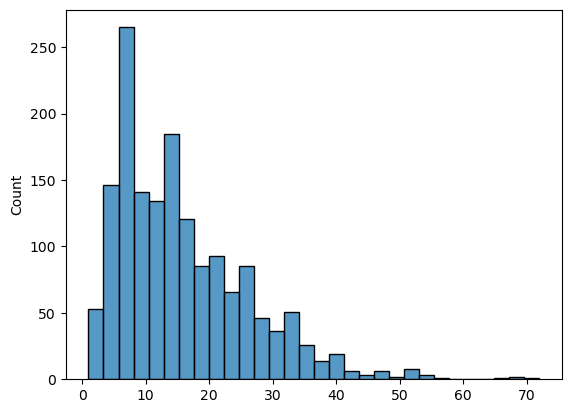

In [94]:
sns.histplot(data_wine["free sulfur dioxide"].values)

plt.show()

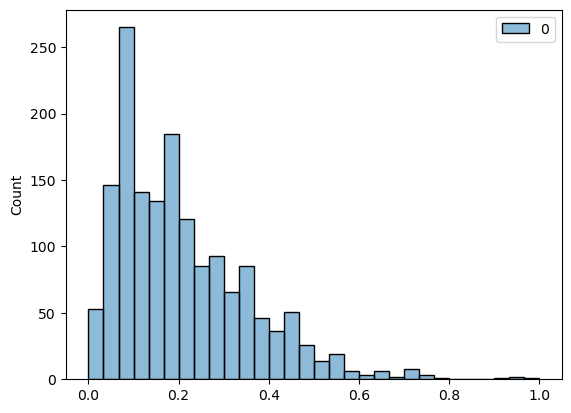

In [95]:
emm = MinMaxScaler()

x = emm.fit_transform(data_wine[["free sulfur dioxide"]])

sns.histplot(x)

plt.show()

### 4.3. Padronização

$z = \frac{x - u}{s}$

$u$ é média, $s$ é desvio padrão e $x$ é valor

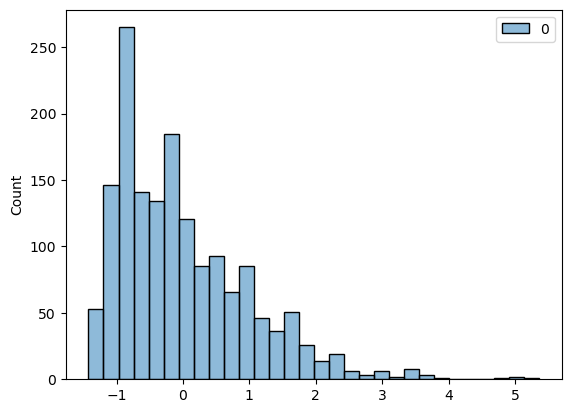

In [96]:
pad = StandardScaler()

x = pad.fit_transform(data_wine[["free sulfur dioxide"]])

sns.histplot(x)

plt.show()

### 4.4. $log_{10}$

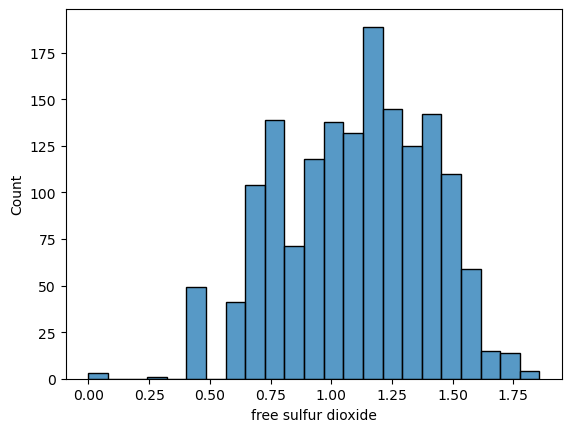

In [97]:
sns.histplot(data_wine["free sulfur dioxide"].apply(np.log10))

plt.show()

## 5. Referências

- [Tutorial Simples de Regex](https://www.w3schools.com/python/python_regex.asp)
- [Documentação do Regex](https://docs.python.org/3/library/re.html)
- [Documentação do OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [Artigo: Por quê eu parei de usar CSV?](why-i-stopped-dumping-dataframes-to-a-csv-and-why-you-should-too-c0954c410f8f)
- [Artigo: O guia definitivo para limpeza de dados](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4)

### 5.1. Extras

- [Site para ler artigos do Medium de graça ;)](https://freedium.cfd/)